<a id='start'></a>
# Исследование объявлений о продаже квартир в Санкт-Петербурге и области

В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Задача:</b><br>
1) определить рыночную стоимость объектов недвижимости; <br>
2) установить параметр, который позволит построить автоматизированную систему, чтобы отследить аномалии и мошенническую деятельность;<br>
3) определить факторы, влияющие на ценообразование стоимости квартир.

<b>Ход исследования: </b>

1) <a href='#section1'>Обзор данных</a>.


2) <a href='#section2'>Предобработка данных</a>:

- поиск и анализ пропущенных значений;
- проверка типов данных;
- поиск явных и неявных дубликатов, уникальных значений.

3) <a href='#section3'>Добавление столбцов с данными о</a>:
- цене одного квадратного метра;
- дне недели, месяце и годе публикации объявления;
- типе этажа квартиры (значения — «первый», «последний», «другой»);
- расстоянии до центра города в километрах.

4) <a href='#section4'>Исследовательский анализ данных</a>:
- анализ параметры объектов (общая и жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа, общее количество этажей в доме, расстояние до центра и ближайшего парка в км.) и построение отдельных гистограмм для таких параметро;
- анализ периода продажи квартиры;
- анализ факторов, влияющих на общую стоимость квартиры;
- анализ средней цены одного кв. м. в 10 населённых пунктах с наибольшим числом объявлений;
- анализ изменения средней цены для каждого километра от центра Петербурга.

5) <a href='#section5'>Общий вывод.</a>

<b>Описание данных:</b>

<b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м);<br>
<b>balcony</b> — число балконов;<br>
<b>ceiling_height</b> — высота потолков (м);<br>
<b>cityCenters_nearest</b> — расстояние до центра города (м);<br>
<b>days_exposition </b>— сколько дней было размещено объявление (от публикации до снятия);<br>
<b>first_day_exposition</b> — дата публикации;<br>
<b>floor</b> — этаж;<br>
<b>floors_total</b> — всего этажей в доме;<br>
<b>is_apartment</b> — апартаменты (булев тип);<br>
<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²);<br>
<b>last_price</b> — цена на момент снятия с публикации;<br>
<b>living_area</b> — жилая площадь в квадратных метрах (м²);<br>
<b>locality_name</b> — название населённого пункта;<br>
<b>open_plan</b> — свободная планировка (булев тип);<br>
<b>parks_around3000</b> — число парков в радиусе 3 км;<br>
<b>parks_nearest</b> — расстояние до ближайшего парка (м);<br>
<b>ponds_around3000</b> — число водоёмов в радиусе 3 км;<br>
<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м);<br>
<b>rooms</b> — число комнат;<br>
<b>studio</b> — квартира-студия (булев тип);<br>
<b>total_area</b> — общая площадь квартиры в квадратных метрах (м²);<br>
<b>total_images</b> — число фотографий квартиры в объявлении.


<a id='section1'></a>
### Обзор данных

In [1]:
#Подключение необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Базовая функция для ознакомления с данными: инфо о типах, явных дубликатах
def show_data(df):
    display(df.head(15))
    print('-----')
    print('Информация о типах данных')
    df.info()
    print('-----')
    print('Явных дубликатов')
    print(df.duplicated().sum())

In [4]:
show_data(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  

In [5]:
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


<u><b>Построение гистограмм

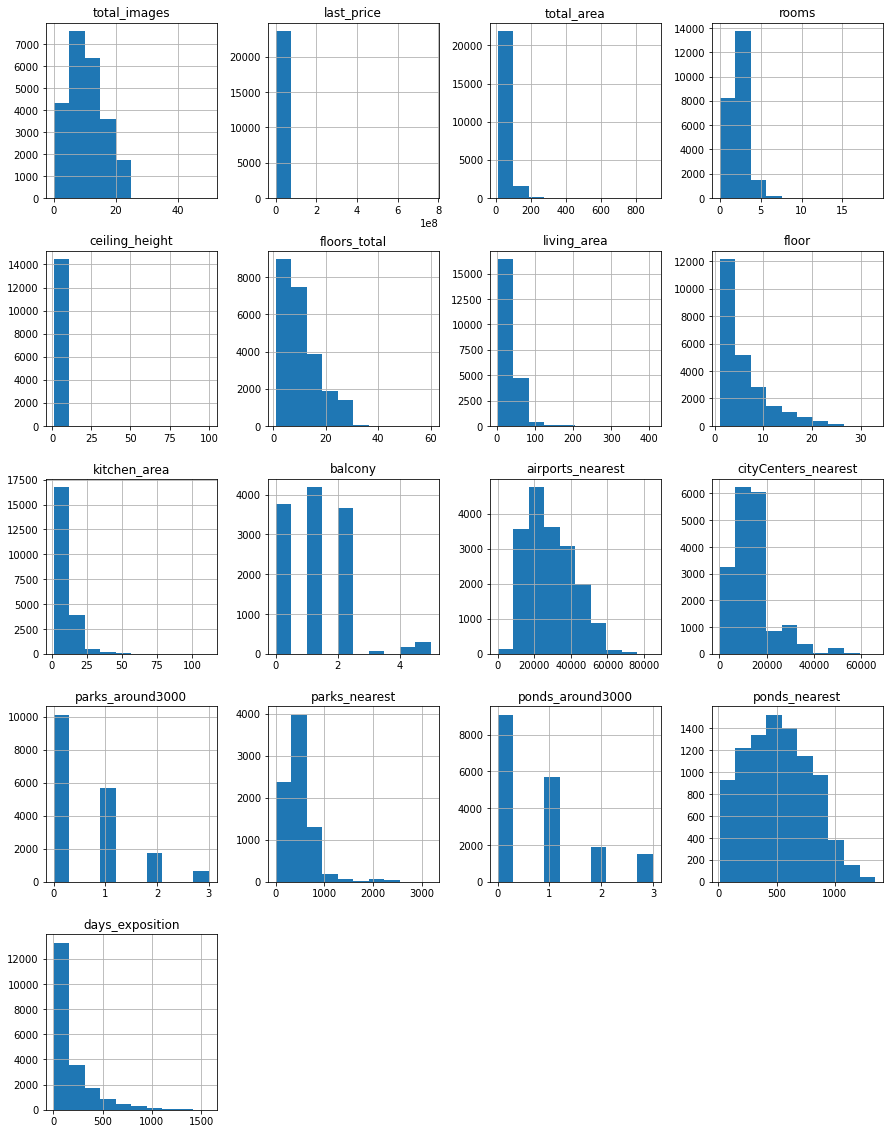

In [6]:
df.hist(figsize=(15, 20));

<b>Вывод:</b>
На первый взгляд можно отметить, что в данных присутстввует большое количество пропусков. Также необходимо будет просмотреть данные на наличии аномалий и корректность типов данных.

<a href='#start'>В начало</a>

<a id='section2'></a>
### Предобработка данных

<u><b>Привидение наименования столбцов в "змеиный" формат

In [7]:
# Наведение "красоты" путем переименования столбцов
df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'}, inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<u><b>Устранение пропусков

In [8]:
#замена всех значений Nane на 0 и изменение типа столбца "is_apartment" на булево
df['is_apartment'] = df['is_apartment'].fillna(0).astype(bool) 

In [9]:
#замена всех значений Nane на 0 и изменение типа столбца "is_apartment" на целочисленное
df['balcony'] = df['balcony'].fillna(0).astype(int)

In [10]:
#замена всех значений Nane на 0 и изменение типа столбца "ponds_around3000" на целочисленное
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype(int)

In [11]:
#замена всех значений Nane на 0 и изменение типа столбца "airports_nearest" на целочисленное
df['airports_nearest'] = df['airports_nearest'].fillna(0).astype(int)

In [12]:
#замена всех значений Nane на 0 и изменение типа столбца "parks_around3000" на целочисленное
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype(int)

In [13]:
#замена всех значений Nane на 0 и изменение типа столбца "parks_nearest" на целочисленное
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype(int)

In [14]:
#замена всех значений Nane на 0 и изменение типа столбца "ponds_nearest" на целочисленное
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype(int)

In [15]:
#замена всех значений Nane на 0 и изменение типа столбца "cityCenters_nearest" на целочисленное
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(0).astype(int)

In [16]:
for loc_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == loc_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == loc_name), 'ceiling_height'] = median
    

#заменим оставщиеся пропуски медианой
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [17]:
#замена всех значенеий Nane на 0 столбца kitchen_area
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df = df.dropna(subset=['floors_total', 'locality_name'])

In [18]:
#изменение типа столбца о количесвте этиажей на целочисленное
df['floors_total'] = df['floors_total'].astype(int)

In [19]:
print(df.isna().sum())
print(df.info())
df.head(15)

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3171
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,0,0,0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14,NaN,9,False,False,False,0.00,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,0,0,0,0,0,0,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,0,0,0,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,0,0,0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,0,0,0,0,0,0,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,0,0,0,289.0


<b>Краткий вывод:</b> В ходе просмотра массива данных было определено, что всего в массиве 23 699 объекта. Пустые значения были по информации о высоте потолка (9 195), всего этажей в доме (86), жилой площади (1 903), типе жилья, а именно апартаменты это или нет (20 924), площади кухни (2 278), наличии балконов (11 519), наименовании населенного пункта (49), информации о расстоянии да ближайшего аэропорта (5542), расстоянии до центра города (5519), расстоянии до ближайшего парка (15 620), о наличии парка в радиусе 3 км (5 518), о наличии водоемов в радиусе 3 км (5 518), о расстоянии до ближайшего водоема (14 589), о количестве дней размещения объявления (3 171). <br>

Для устранения пропусков было принято решение:<br>
1) Заменить пропущенную информацию на 0 для информации о наличии балконов, о расстоянии до ближайшего водоема, о наличии водоемов в радиусе 3 км, о наличии парка в радиусе 3 км, расстоянии до ближайшего парка, расстоянии до центра города, информации о расстоянии да ближайшего аэропорта, так как скорее всего данные не были указаны по причине отсутствия вышеописанных объектов (например в квартире нет балконов, в поселке нет парка или водоема). Всем данным был присвоен целочисленный тип.<br><br>
2) Пропуски информации о типе квартире также были заменены на 0, так как скорее всего были заполнены данные, если квартира является апартаментами. Для таких данных был присвоен булевый тип.<br>
3) Скорее всего пропущенная информация о размере кухни отсутствует по причине того, что квартира является студией, прощенные значения были заменены на 0.<br>
4) Прокушенная информация о высоте потолка была заменена на медианное значение относительно района расположения квартиры. Все что, не получилось заполнить, было заменено на медиану по общим данным, так как высота потолка, как правило, в домах стандартная.<br><br>
5) Пропущенная информация о количестве этажей в доме и наименовании населенного пункта была удалена, так как является трудно верифицируемой и количество такой информации достаточно мало.<br><br>
6) Пробущенную информацию по столбцам жилая площадь и количество дней со дня публикации была оставлена, т.к. в части количества дней с даты размещения информация отстстсвует по причине активности объявления. Жилую площадь заполнять каким-либо медиааным или срденим значением не совсем корректно, пустых данных по данному столбцу около 10%, поэтому удалять также не верно. Было приянто оставить такие пропуски.

<u><b>Устранение неявных дубликатов

Ранее уже было определено, что явных дубликатов в массиве данных нет. Проверим данные на неявные дубликаты.

In [20]:
#анализ размера уникальных значений по столбцу "населенный пункт"
print('Количество уникальных населенных пунктов:', len(df['locality_name'].unique()))

Количество уникальных населенных пунктов: 364


In [21]:
#для удобства отсортируем значения 
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [22]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', '')
df['locality_name'] = df['locality_name'].str.replace('поселок', '')
df['locality_name'] = df['locality_name'].str.replace('деревня', '')
df['locality_name'] = df['locality_name'].str.replace('городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции', '')
df['locality_name'] = df['locality_name'].str.replace('станции', '')
df['locality_name'] = df['locality_name'].str.replace('городской', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество', '')
df['locality_name'] = df['locality_name'].str.replace('село', '')
df['locality_name'] = df['locality_name'].str.replace('имени', '')
df['locality_name'] = df['locality_name'].str.lstrip()
print('Количество уникальных населенных пунктов после обработки:',len(df['locality_name'].unique()))

Количество уникальных населенных пунктов после обработки: 305


<b>Краткий вывод: </b>Для устранения неявных дубликатов по столбцу "населенный пункт" было принято решение оставить только наименование населенных пунктов. Был применен метод replace. Также для удаления лишних пробелов в начале строки был применен метод lstrip. После проведения всех операций уникальных значений столо 305.

<u><b>Устранение аномалий

<u>Жилая площадь квартиры

In [23]:
df['living_area'].agg(['min','max','mean','median'])

min         2.000000
max       409.700000
mean       34.454822
median     30.000000
Name: living_area, dtype: float64

In [24]:
print('Количество квартир с площадью менее 10 кв.м. -', len(df.query('living_area < 10')))

Количество квартир с площадью менее 10 кв.м. - 25


In [25]:
df.loc[df['living_area'] < 10, 'living_area'] = None
df.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


<u>Высота потолка

In [26]:
df['ceiling_height'].agg(['min','max','mean','median'])

min         1.000000
max       100.000000
mean        2.733882
median      2.700000
Name: ceiling_height, dtype: float64

In [27]:
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.5149999999999997,
 2.52,
 2.525,
 2.53,
 2.54,
 2.55,
 2.5549999999999997,
 2.5599999999999996,
 2.56,
 2.57,
 2.575,
 2.58,
 2.59,
 2.5999999999999996,
 2.6,
 2.61,
 2.615,
 2.62,
 2.625,
 2.63,
 2.64,
 2.65,
 2.6500000000000004,
 2.66,
 2.67,
 2.675,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.725,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.6

In [28]:
df.loc[df['ceiling_height'] >=24, 'ceiling_height'] /= 10
df = df.query('ceiling_height > 2 and ceiling_height < 10')
sorted(df['ceiling_height'].unique())

[2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.5149999999999997,
 2.52,
 2.525,
 2.53,
 2.54,
 2.55,
 2.5549999999999997,
 2.5599999999999996,
 2.56,
 2.57,
 2.575,
 2.58,
 2.59,
 2.5999999999999996,
 2.6,
 2.61,
 2.615,
 2.62,
 2.625,
 2.63,
 2.64,
 2.65,
 2.6500000000000004,
 2.66,
 2.67,
 2.675,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.725,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 

<b>Краткий вывод: </b>При анализе информации о высоте потолка было выявлены аномалии, а именно высота менее 2 и более 10 метров. Также в таких данных, как 10.3, 14, 24.5 скорее всего была допущена ошибка в размерности, такие данные были разделены на 10. Затем были выбраны даннные в диапозоне от 2 до 10 метров, т.к. потолков ниже 2 метров и выше 10 не предусмотрены (если это не частный дом)

<b>Вывод по предобработке данных: </b> При проведении предобработки данных было обнаружено большое число пропущенных значений (по некоторым данным пропуски достигали 20 000). Для устранения пропусков были применены методы удаления строк (если таких значений не много), замены на 0 (там где это логически возможно и можно объяснить причину пропуска), замены на медианные значения по общим параметрам и похожим свойствам (по принадлежности к району). Пропуски, которые не возможно заменить, были оставлены. Также были привидены в соответствия типы столбцов, были отработаны аномалии (путем правок или удаления). Был произведен поиск явных дубликатов - в массиве таких не оказалось. Произведена подмена неявных дубликатов (было принято решение оставить только наименование населенных пунктов). В результате предобработки данных массив сократился с 23 699 до 23 546 тыс. данных, что составляет менее 1% от исходных размеров.

<a href='#start'>В начало</a>

<a id='section3'></a>
### Добавление столбцов с данными

<u><b>Подсчет цены одного кв. метра

In [29]:
df['price_sq_metrs'] = (df['last_price'] / df['total_area']).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metrs
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0,0,0,0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.00


In [30]:
df['price_sq_metrs'].agg(['min','max','mean','median']).round(2)

min           111.83
max       1907500.00
mean        99408.43
median      95000.00
Name: price_sq_metrs, dtype: float64

<b>Краткий вывод: </b>При анализе цены за квадратный метр видно, что средняя цена по Лениградской области составляет порядка 100 т.р. Выбивается минимальное значение в стоимости квадратного метра. Такое значение необходимо убрать. Предположим, что минимальная цена начинается от 10 тыс. руб.

In [31]:
df = df.query('price_sq_metrs > 10000')
df['price_sq_metrs'].min()

10185.19

<u><b>Форматирование даты

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%')
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['monht_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metrs,weekday_exposition,monht_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0,0,0,0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.00,1,6,2018


Для удобства формат даты был переведен в гггг-мм-дд, данные по времени добавлены не были, т.к. во всех датах стоял 00:00. Также были добавлены столбцы день, месяц и год публикации объявления.

In [33]:
df['year_exposition'].value_counts()

2018    8473
2017    8154
2019    2868
2016    2743
2015    1166
2014     136
Name: year_exposition, dtype: int64

<b>Краткий вывод: </b>По результатам анализа можно отметить, что в период с 2015 по 2018 количество обявлений росло, в 2018, 2019 гг. наоборот наметился тренда на снижение.

<u><b>Добавление информации об этаже

In [34]:
def categorize_floors(row):
    
    floor = row ['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой' 

In [35]:
df['floor_info'] = df.apply(categorize_floors, axis=1)

#проверка работы функции
df['floor_info'].unique() 

array(['другой', 'первый', 'последний'], dtype=object)

In [36]:
#подсчет значений по заданным параметрам
df['floor_info'].value_counts() 

другой       17312
последний     3324
первый        2904
Name: floor_info, dtype: int64

<b>Краткий вывод: </b>Как видно из анализа, особой популярностью пользуются этажи расположенные не на первом и последнем этажах, что вполне логично.

<u><b>Добавление информации о расстоянии до центра города

In [37]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).astype(int)
df[['city_centers_nearest', 'city_centers_nearest_km']].head()

,city_centers_nearest,city_centers_nearest_km
0,16028,16
1,18603,18
2,13933,13
3,6800,6
4,8098,8


<b>Вывод: </b>Для добавления информации о расстоянии до центра города в км столбец "city_centers_nearest" был разделен на 1000.

<a href='#start'>В начало</a>

<a id='section4'></a>
### Исследовательский анализ данных

<u><b>Анализ общей площади

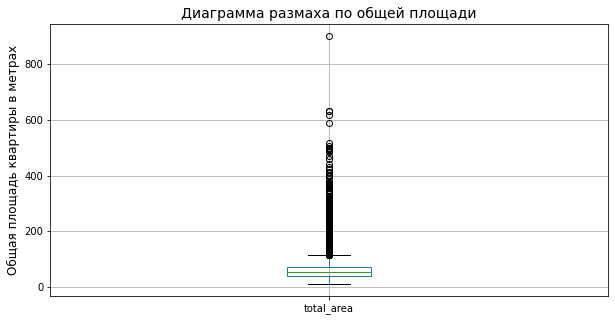

In [38]:
#построение диаграммы размаха
df.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по общей площади', fontsize = 14)
plt.ylabel('Общая площадь квартиры в метрах', fontsize = 12)
plt.show()

In [39]:
#получение статистических данных
df['total_area'].describe().round(2)

count    23540.00
mean        60.33
std         35.67
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Согласно построенной диаграмме и статистическим данным, общая площадь свыше 70 кв.м. выбивается из выборки.

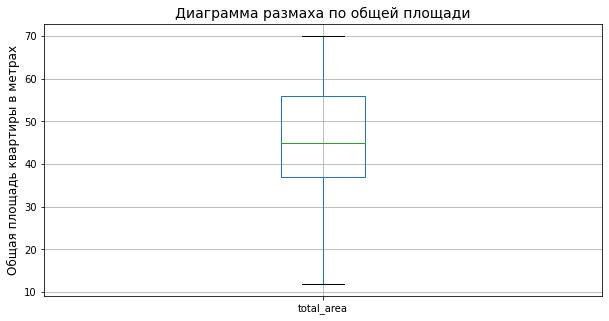

In [40]:
#построение диаграммы размаха и отсечение квартир больше 70 метров
good_df = df.query('total_area < 70')
good_df.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по общей площади', fontsize = 14)
plt.ylabel('Общая площадь квартиры в метрах', fontsize = 12)
plt.show()

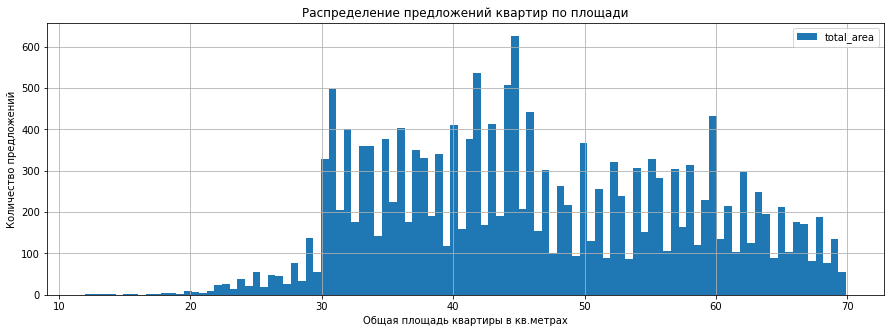

In [41]:
#сортировка и построение гистограммы
good_df.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area', bins=100, figsize=(15,5), grid=True)

plt.title('Распределение предложений квартир по площади')
plt.xlabel('Общая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Согласно построенной гистограмме можно сделать предположить, что наибольшее количество предложений приходится на размер квартиры от 30 до 45 кв. метров. Самое большое количество предложений для квартир с площадью 45 кв.м.

<u><b>Анализ жилой площади

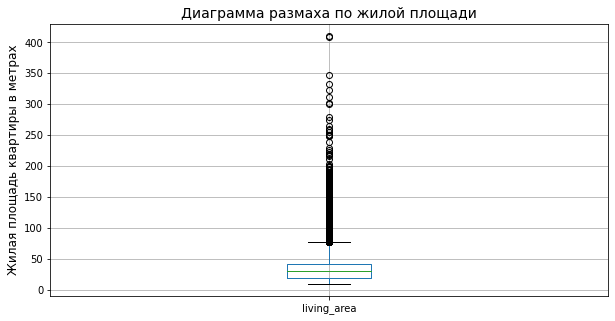

In [42]:
#построение диаграммы размаха
df.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по жилой площади', fontsize = 14)
plt.ylabel('Жилая площадь квартиры в метрах', fontsize = 12)
plt.show()

In [43]:
#получение статистических данных
df['living_area'].describe().round(2)

count    21653.00
mean        34.49
std         22.04
min         10.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Согласно построенной диаграмме размаха и статистическим данным, жилая площадь свыше 45 кв.м. выбивается из выборки.

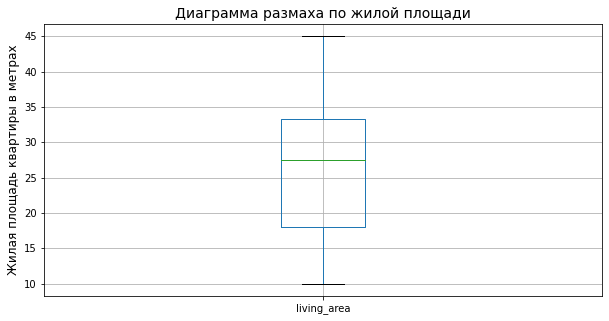

In [44]:
#построение диаграммы размаха и отсечение квартир с жилой площадью более 45 метров
good_df = df.query('living_area < 45')
good_df.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по жилой площади', fontsize = 14)
plt.ylabel('Жилая площадь квартиры в метрах', fontsize = 12)
plt.show()

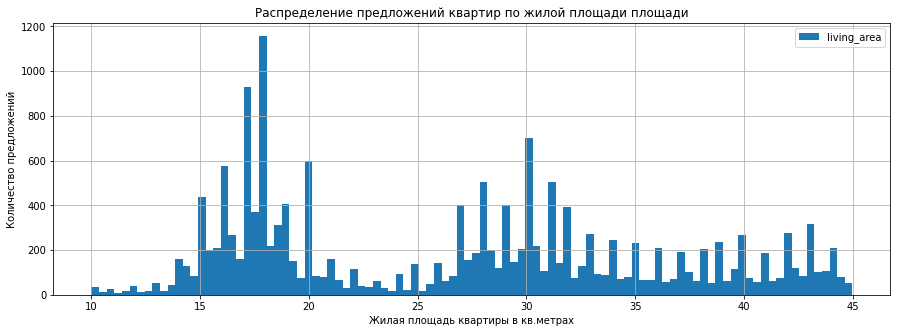

In [45]:
#сортировка и построение гистограммы
good_df.sort_values(by='living_area', ascending=True).plot(kind='hist', y='living_area', bins=100, figsize=(15,5), grid=True)

plt.title('Распределение предложений квартир по жилой площади площади')
plt.xlabel('Жилая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Согласно построенной гистограмме можно сделать вывод, что имеется два диапазона наиболее популярных предложений по продажам квартир. Больший пик приходится на жилую площадь в диапозоне от 15 до 20 кв. метров. Второй пик приходится на диапазон от 27 до 33 кв.м.

<u><b>Анализ площади кухни

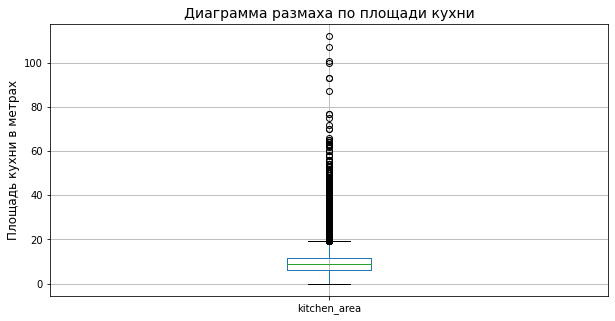

In [46]:
#построение диаграммы размаха
df.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по площади кухни', fontsize = 14)
plt.ylabel('Площадь кухни в метрах', fontsize = 12)
plt.show()

In [47]:
#получение статистических данных
df['kitchen_area'].describe().round(2)

count    23540.00
mean         9.57
std          6.41
min          0.00
25%          6.30
50%          9.00
75%         11.42
max        112.00
Name: kitchen_area, dtype: float64

Согласно построенной диаграмме размаха, площадь кухни свыше 11 кв.м. выбивается из значения. Также уберем кухни-студии.

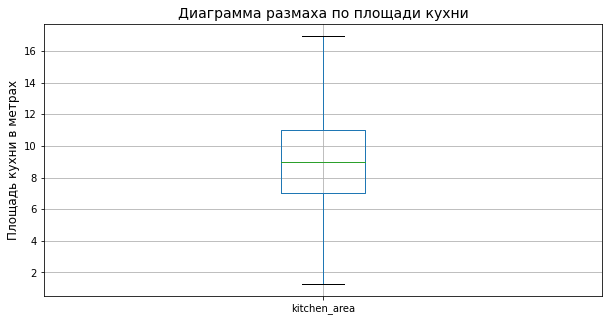

In [48]:
#построение диаграммы размаха и отсечение квартир с площадью кухонь более 11 метров и квартир-студий
good_df = df.query('kitchen_area < 17 & kitchen_area > 0')
good_df.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по площади кухни', fontsize = 14)
plt.ylabel('Площадь кухни в метрах', fontsize = 12)
plt.show()

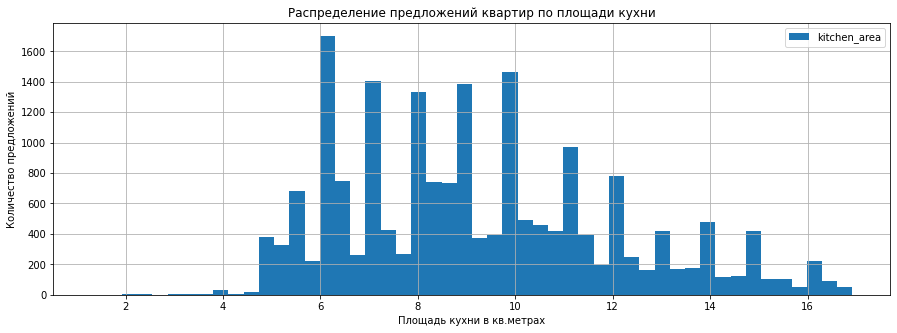

In [49]:
#сортировка и построение гистограммы
good_df.sort_values(by='kitchen_area', ascending=True).plot(kind='hist', y='kitchen_area', bins=50, figsize=(15,5), grid=True)

plt.title('Распределение предложений квартир по площади кухни')
plt.xlabel('Площадь кухни в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Самые популярные размеры кухни держаться в диапазоне 6 - 10 кв. метров.

<u><b>Анализ цены объекта

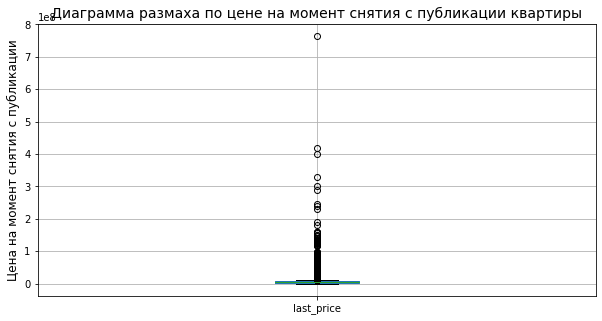

In [50]:
#построение диаграммы размаха
df.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по цене на момент снятия с публикации квартиры', fontsize = 14)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

In [51]:
#получение статистических данных
df['last_price'].describe().round(2)

count    2.354000e+04
mean     6.543002e+06
std      1.091578e+07
min      4.300000e+05
25%      3.407500e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Согласно диаграмме размаха, большинство предложений расположено в диапазоне 1,2 и 7 млн руб. Остальные данные уберем.

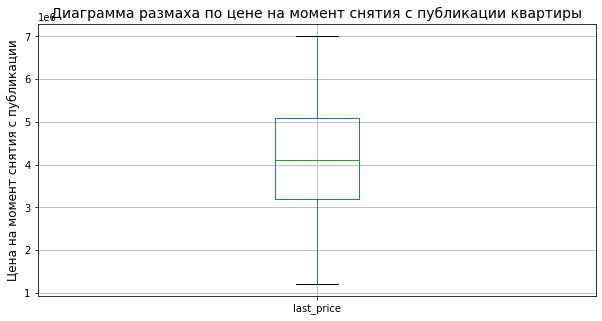

In [52]:
#построение диаграммы размаха и отсечение квартир со стоимстью квартир в диапазоне 1,2-7 млн руб.
good_df = df.query('last_price < 7000000 & last_price > 1200000')
good_df.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по цене на момент снятия с публикации квартиры', fontsize = 14)
plt.ylabel('Цена на момент снятия с публикации', fontsize = 12)
plt.show()

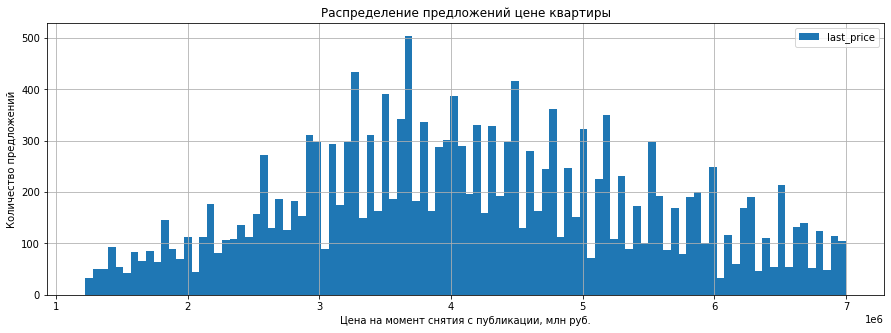

In [53]:
#сортировка и построение гистограммы
good_df.sort_values(by='last_price', ascending=True).plot(kind='hist', y='last_price', bins=100, figsize=(15,5), grid=True)

plt.title('Распределение предложений цене квартиры')
plt.xlabel('Цена на момент снятия с публикации, млн руб.')
plt.ylabel('Количество предложений')
plt.show()

<b>Кратки вывод: </b>Наибольшее число предложений в диапазоне 3,2-5,2 млн руб. Самый популярные предложения со стоимостью 3,7 млн руб.

<u><b>Анализ количества комнат

In [54]:
#подсчет количества значений по комнатам
df['rooms'].value_counts()

1     7994
2     7887
3     5774
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

При анализе количества квартир по комнатам в них видно, что квартир с количеством комнат более 6 уже достаточно мало. Такие предложения остечем.

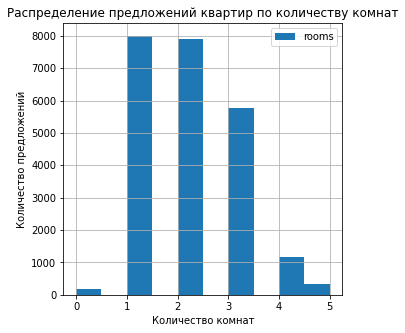

In [55]:
#отсечение данных по количеству комнат и построение столбчатого графика
good_df = df.query('rooms < 6')
good_df.sort_values(by='rooms', ascending=True).plot(kind='hist', y='rooms', bins=10, figsize=(5,5), grid=True)

plt.title('Распределение предложений квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Самым популярным вариантом является одно- и двухкомнатные квартиры.

<u><b>Анализ высоты потолков

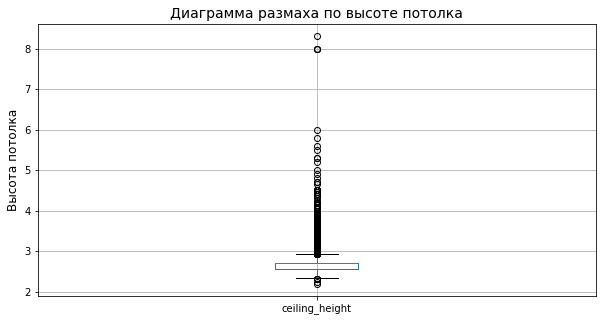

In [56]:
#построение диаграммы размаха
df.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по высоте потолка', fontsize = 14)
plt.ylabel('Высота потолка', fontsize = 12)
plt.show()

In [57]:
#получение статистических данных
df['ceiling_height'].describe().round(2)

count    23540.00
mean         2.71
std          0.24
min          2.20
25%          2.55
50%          2.70
75%          2.70
max          8.30
Name: ceiling_height, dtype: float64

В соответствии с диграммой размаха, данные с высотой потолка ниже 2,4 и выше 2,7 выбиваются из выборки.

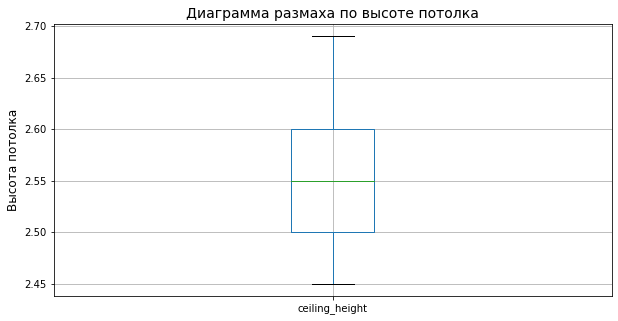

In [58]:
#построение диаграммы размаха и отсечение квартир с высотой потолка ниже 2,4 и выше 2,7
good_df = df.query('ceiling_height < 2.7 & ceiling_height > 2.4')
good_df.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по высоте потолка', fontsize = 14)
plt.ylabel('Высота потолка', fontsize = 12)
plt.show()

Text(0, 0.5, 'Количество предложений')

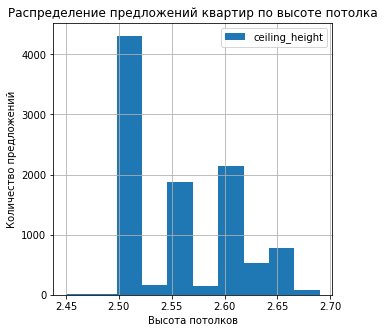

In [59]:
#сортировка и построение гистограммы
good_df.sort_values(by='ceiling_height', ascending=True).plot(kind='hist', y='ceiling_height', bins=10, figsize=(5,5), grid=True)

plt.title('Распределение предложений квартир по высоте потолка')
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')

<b>Краткий вывод: </b>Как видно из графика, на рынке больше всего предложений с высотой потолка 2,65.

<u><b>Анализ этажности дома

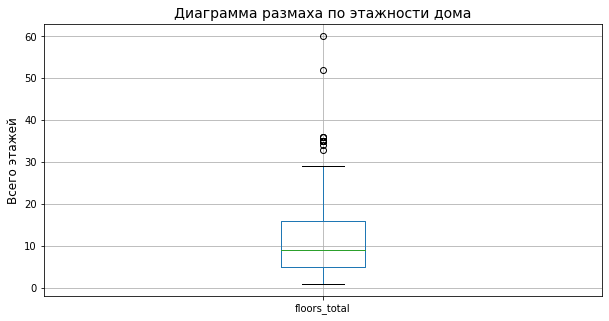

In [60]:
#построение диаграммы размаха
df.boxplot(column=['floors_total'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по этажности дома', fontsize = 14)
plt.ylabel('Всего этажей', fontsize = 12)
plt.show()

В соответствии с диграммой размаха, дома, чья этажность выше 30, выбиваются из выборки.

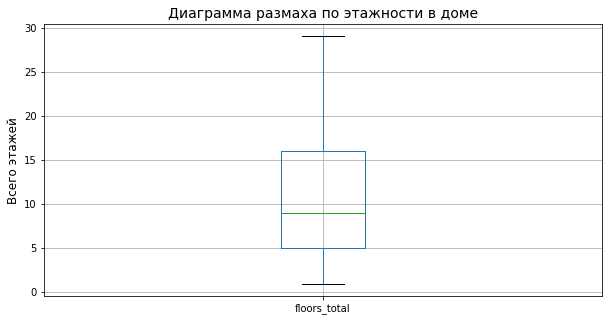

In [61]:
#построение диаграммы размаха и отсечение квартир количеством этажей больше 30
good_df = df.query('floors_total < 30')
good_df.boxplot(column=['floors_total'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по этажности в доме', fontsize = 14)
plt.ylabel('Всего этажей', fontsize = 12)
plt.show()

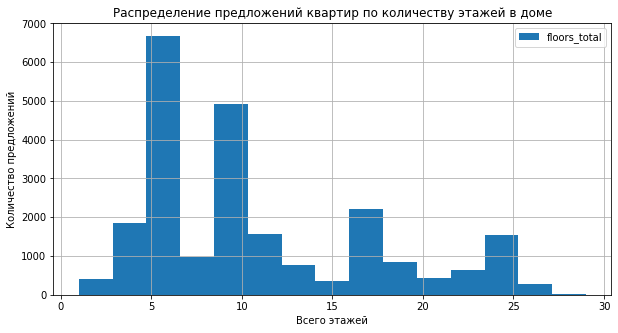

In [62]:
#сортировка и построение гистограммы
good_df.sort_values(by='floors_total', ascending=True).plot(kind='hist', y='floors_total', bins=15, figsize=(10,5), grid=True)

plt.title('Распределение предложений квартир по количеству этажей в доме')
plt.xlabel('Всего этажей')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Больше всего предложений для домов с 5 и 10 этажами. 

<b><u>Анализ типа этажа

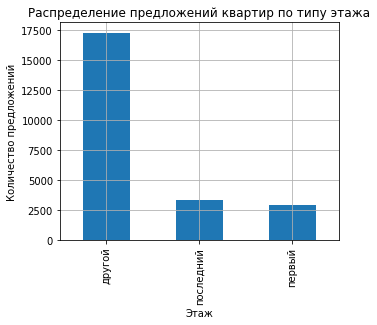

In [63]:
#Сортировка и построения барплота по типу этажа
good_df['floor_info'].value_counts().plot(kind='bar', x='floor_info', figsize=(5,4), grid=True)

plt.title('Распределение предложений квартир по типу этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.show()

In [64]:
good_df['floor_info'].value_counts()

другой       17281
последний     3324
первый        2904
Name: floor_info, dtype: int64

<b>Краткий вывод: </b>Как видно из графика, больше всего предложений на не на первом и не на последнем этажах. Предложениий продаж на последних этажах больше, чем на первых (ок. 15%).

<u><b>Анализ этажа квартиры

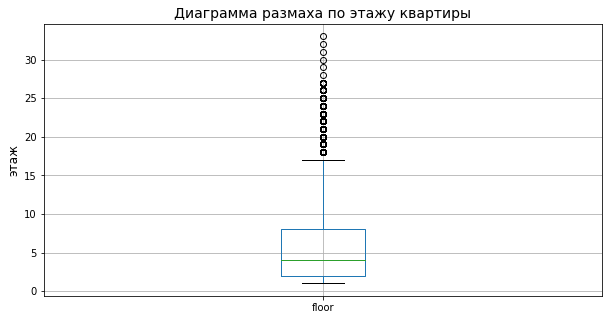

In [65]:
#построение диаграммы размаха
df.boxplot(column=['floor'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по этажу квартиры', fontsize = 14)
plt.ylabel('этаж', fontsize = 12)
plt.show()

В соответствии с диграммой размаха, квартиры выше 14 этажа выбиваются из выборки.

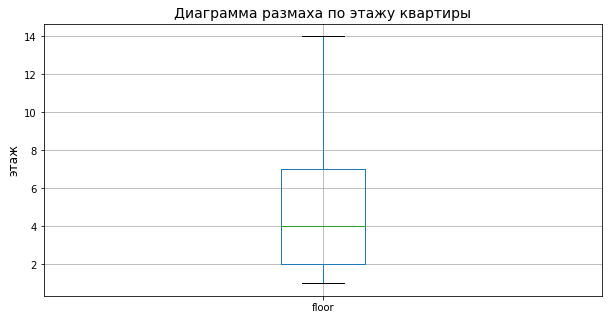

In [66]:
#построение диаграммы размаха и отсечение квартир выше 15 этажа
good_df = df.query('floor < 15')
good_df.boxplot(column=['floor'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по этажу квартиры', fontsize = 14)
plt.ylabel('этаж', fontsize = 12)
plt.show()

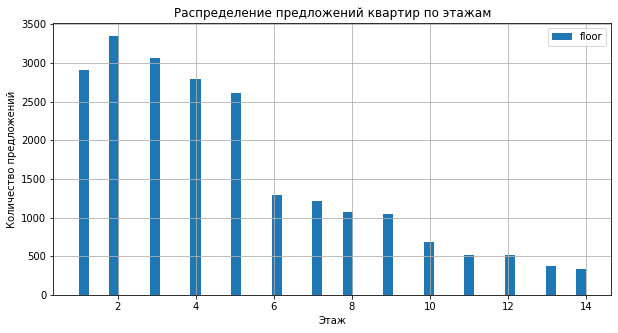

In [67]:
#сортировка и построение гистограммы
good_df.sort_values(by='floor', ascending=True).plot(kind='hist', y='floor', bins=50, figsize=(10,5), grid=True)

plt.title('Распределение предложений квартир по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Больше всего предложений для квартир на 2 этаже, далее идет 3 этаж. Стоит отметить, что выше этаж, тем предложений меньше.

<u><b>Анализ расстояния до центра города в метрах

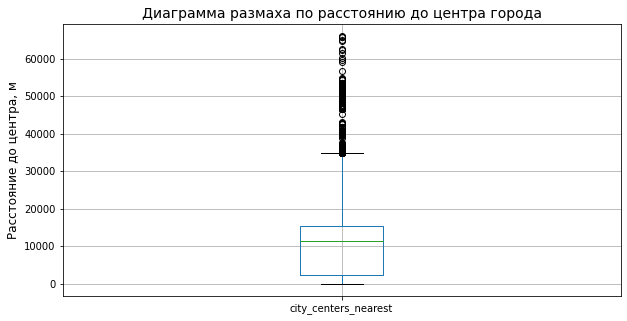

In [68]:
#построение диаграммы размаха
df.boxplot(column=['city_centers_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до центра города', fontsize = 14)
plt.ylabel('Расстояние до центра, м', fontsize = 12)
plt.show()

В соответствии с диграммой размаха, большинство квартир расположены на расстоянии до 25000 метров

In [69]:
#получение статистических данных
df['city_centers_nearest'].describe().round(2)

count    23540.00
mean     10884.64
std       9639.90
min          0.00
25%       2230.75
50%      11247.00
75%      15245.00
max      65968.00
Name: city_centers_nearest, dtype: float64

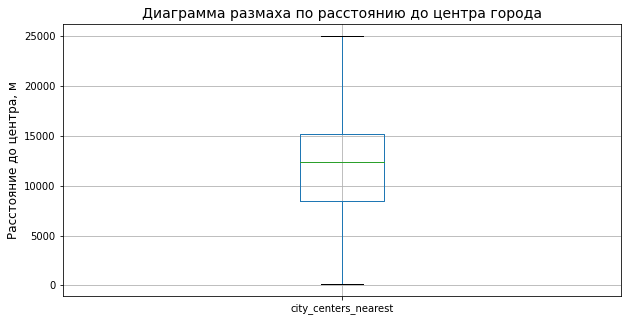

In [70]:
#построение диаграммы размаха и отсечение квартир c удаленностью от центра до 25 км
good_df = df.query('city_centers_nearest < 25000 & city_centers_nearest != 0')
good_df.boxplot(column=['city_centers_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до центра города', fontsize = 14)
plt.ylabel('Расстояние до центра, м', fontsize = 12)
plt.show()

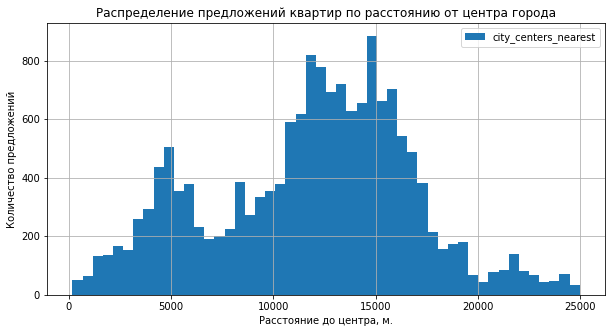

In [71]:
#сортировка и построение гистограммы
good_df.sort_values(by='city_centers_nearest', ascending=True).plot(kind='hist', y='city_centers_nearest', bins=50, figsize=(10,5), grid=True)

plt.title('Распределение предложений квартир по расстоянию от центра города')
plt.xlabel('Расстояние до центра, м.')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Больше всего предложений для квартир на расстоянии от 10 до 16 км. Также много квартир продается на удаленности ок. 5 км.

<b><u>Анализ расстояния до ближайшего аэропорта

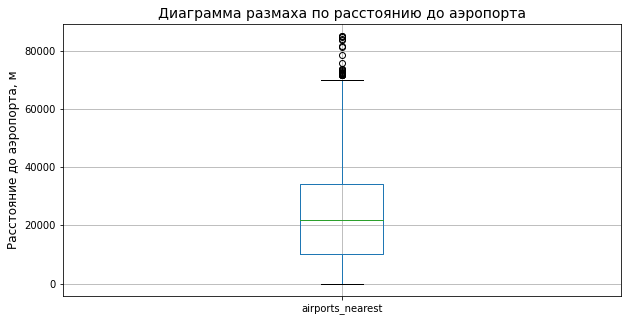

In [72]:
#построение диаграммы размаха
df.boxplot(column=['airports_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до аэропорта', fontsize = 14)
plt.ylabel('Расстояние до аэропорта, м', fontsize = 12)
plt.show()

В соответствии с диграммой размаха, квартиры большинство квартир расположены на расстоянии до 64000 метров от аэропорта

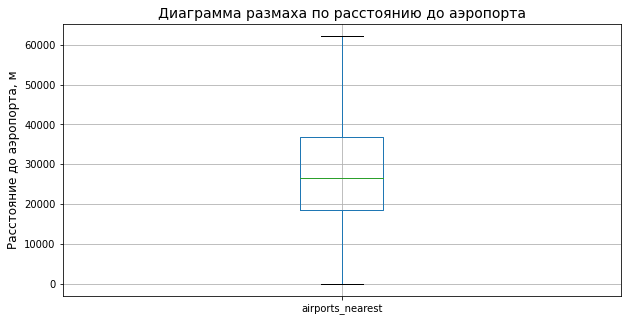

In [73]:
#построение диаграммы размаха и отсечение квартир c удаленностью от аэропорта до 64 км
good_df = df.query('airports_nearest < 64000 & city_centers_nearest != 0')
good_df.boxplot(column=['airports_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до аэропорта', fontsize = 14)
plt.ylabel('Расстояние до аэропорта, м', fontsize = 12)
plt.show()

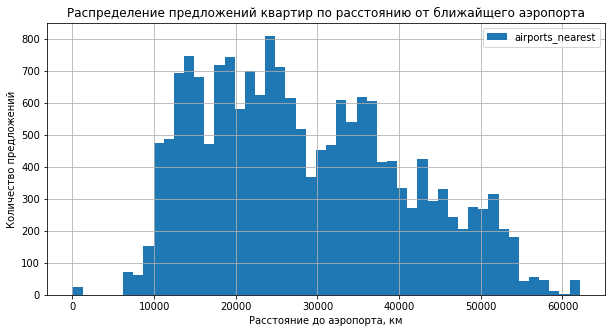

In [74]:
#сортировка и построение гистограммы
good_df.sort_values(by='airports_nearest', ascending=True).plot(kind='hist', y='airports_nearest', bins=50, figsize=(10,5), grid=True)

plt.title('Распределение предложений квартир по расстоянию от ближайщего аэропорта')
plt.xlabel('Расстояние до аэропорта, км')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Как видно из гистограммы пик предложений приходится на расстоянии от 12 до 27 км. Далее следует тренд на снижение предложений.

<b><u>Анализ расстояния до ближайшего парка

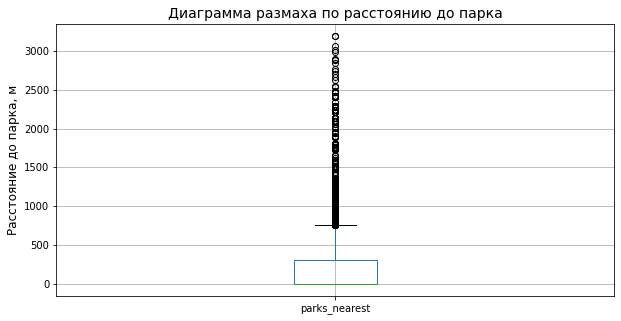

In [75]:
#построение диаграммы размаха
df.boxplot(column=['parks_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до парка', fontsize = 14)
plt.ylabel('Расстояние до парка, м', fontsize = 12)
plt.show()

В соответствии с диграммой размаха, большинство квартир расположены на расстоянии до 1000 метров от парка

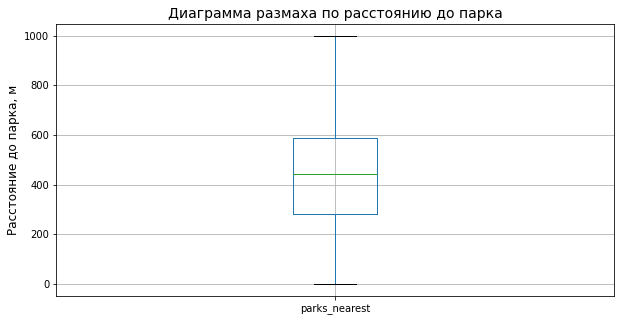

In [76]:
#построение диаграммы размаха и отсечение квартир c удаленностью от парка до 1000 м
good_df = df.query('parks_nearest < 1000 & parks_nearest != 0')
good_df.boxplot(column=['parks_nearest'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по расстоянию до парка', fontsize = 14)
plt.ylabel('Расстояние до парка, м', fontsize = 12)
plt.show()

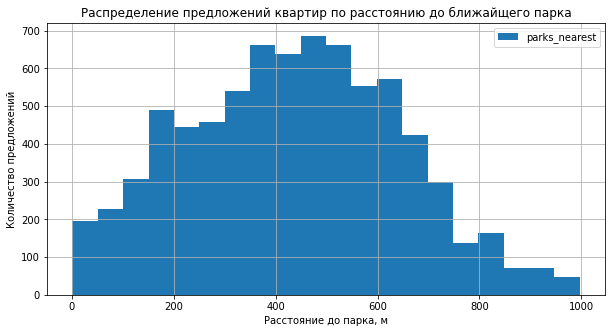

In [77]:
#сортировка и построение гистограммы
good_df.sort_values(by='parks_nearest', ascending=True).plot(kind='hist', y='parks_nearest', bins=20, figsize=(10,5), grid=True)

plt.title('Распределение предложений квартир по расстоянию до ближайщего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>Наибольшее предложений по прадажам для квартир на удаленности от парка порядка 380 - 650 метров.

<b><u>Анализ дня и месяца публикации объявления

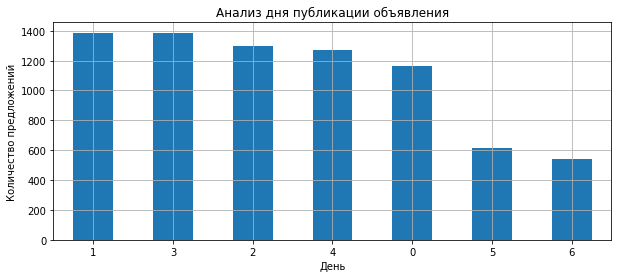

In [78]:
#построение барплота
good_df['weekday_exposition'].value_counts().plot(kind='bar', x='weekday_exposition', figsize=(10,4), grid=True)
plt.title('Анализ дня публикации объявления')
plt.xlabel('День')
plt.xticks(rotation=0)
plt.ylabel('Количество предложений')
plt.show()

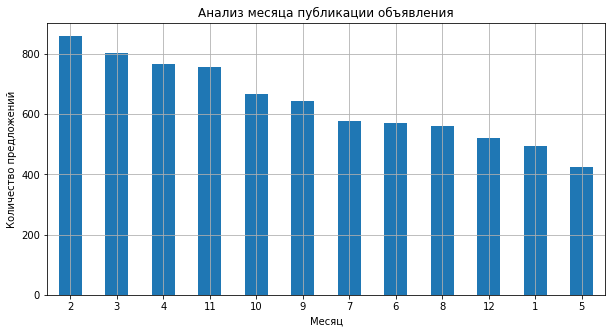

In [79]:
#построение барплота
good_df['monht_exposition'].value_counts().plot(kind='bar', x='monht_exposition', figsize=(10,5), grid=True)

plt.title('Анализ месяца публикации объявления')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.ylabel('Количество предложений')
plt.show()

<b>Краткий вывод: </b>По результатам проведенного анализа можно отметить, что чаше всего объявления публикуют в четверг и вторник. В выходные, ожидаемое, размещений меньше. Если рассматривать информацию по месяцам, то больше всего объявлений размещаются в феврале - апреле и ноябре. Меньше всего объевления в январе и мае, вероятно из-за большого количества праздников.

<b><u>Срок продажи квартиры

In [80]:
good_df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metrs,weekday_exposition,monht_exposition,year_exposition,floor_info,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.37,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785.71,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176.10,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000.00,1,6,2018,другой,8
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137.0,127525.25,3,11,2017,другой,13
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,Петергоф,37868,33058,1,294,3,298,366.0,82943.93,5,7,2017,последний,33
15,16,4650000.0,39.0,2017-11-18,1,2.70,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900,14259,1,590,1,296,19.0,119230.77,5,11,2017,другой,14
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108,10698,3,420,0,0,397.0,81707.32,3,11,2017,первый,10
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060,10842,1,759,0,0,168.0,104838.71,4,1,2017,другой,10
21,13,3200000.0,31.6,2018-03-14,1,2.70,5,16.9,2,False,False,False,5.7,1,Санкт-Петербург,36064,9722,1,248,0,0,310.0,101265.82,2,3,2018,другой,9


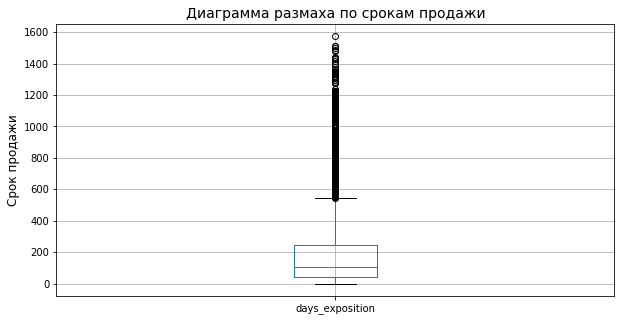

In [81]:
#построение диаграммы размаха
good_df.boxplot(column=['days_exposition'], figsize=(10,5), grid=True)
plt.ylabel('Срок продажи')
plt.title(f'Диаграмма размаха по срокам продажи', fontsize = 14)
plt.ylabel('Срок продажи', fontsize = 12)
plt.show()

In [82]:
good_df['days_exposition'].describe().round(2)

count    6555.00
mean      192.70
std       232.08
min         1.00
25%        45.00
50%       104.00
75%       246.00
max      1572.00
Name: days_exposition, dtype: float64

В соответствии с диграммой размаха, квартиры со сроком продажи более 250 дней являются редкими явлениями. Такие позиции будут исключены.

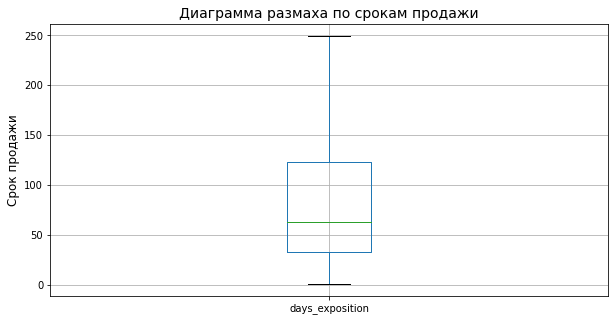

In [83]:
#построение диаграммы размаха и отсечение квартир cо сроком продажи более 250 дней
good_df = df.query('days_exposition < 250')
good_df.boxplot(column=['days_exposition'], figsize=(10,5), grid=True)
plt.title(f'Диаграмма размаха по срокам продажи', fontsize = 14)
plt.ylabel('Срок продажи', fontsize = 12)
plt.show()

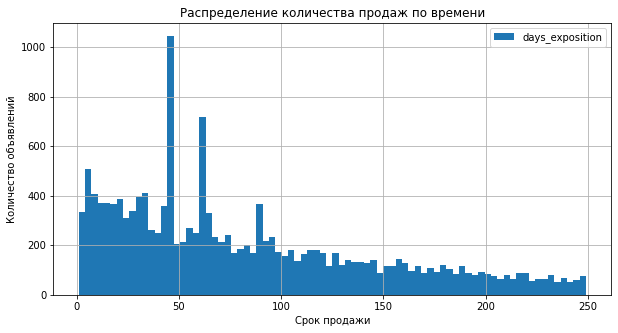

In [84]:
good_df.plot(kind='hist',y='days_exposition', bins=80, figsize=(10,5), grid=True)

plt.title('Распределение количества продаж по времени')
plt.xlabel('Срок продажи')
plt.ylabel('Количество объявлений')
plt.show()

<b>Краткий вывод: </b>В среднем квартира продается за 83 дня, медианное значение равно 63 дням. Максимальный срок продажи квартиры составил 1572 дня. Быстрой продажей можно считать квартиры, которые были проданы менее, чем 33 дня. Продажи свыше 250 дней можно считать уже крайне долгими.

<b><u>Факторы, влияющие на стоимость квартиры

<i><u>Зависимость стоимости от площади квартиры<

            total_area  last_price
total_area    1.000000    0.628364
last_price    0.628364    1.000000


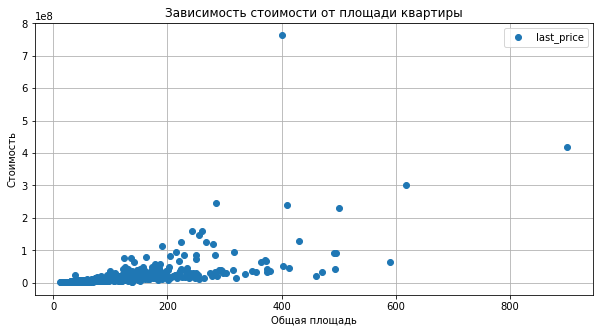

In [85]:
#построение диаграммы разброса и корреляции при помощи сводной таблицы

good_df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5))

plt.title('Зависимость стоимости от площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
print(good_df.pivot_table(index='total_area', values=['last_price']).reset_index().corr())

<b>Краткий вывод: </b> Как видно из графика стоимость жилья и его общей площади имеют заметную корреляцию (0,63). Зависимость по данным параметрам есть. Чем больше площадь, тем соответсвенно выше стоимость.

<u><i>Зависимость стоимости от жилой площади квартиры</i></u>

             living_area  last_price
living_area     1.000000    0.633682
last_price      0.633682    1.000000


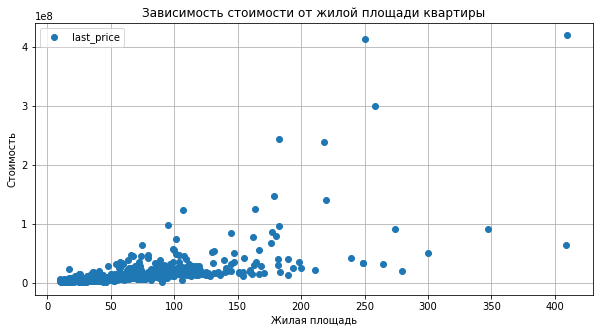

In [86]:
#построение диаграммы разброса и корреляции при помощи сводной таблицы
good_df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5))

plt.title('Зависимость стоимости от жилой площади квартиры')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
print(good_df.pivot_table(index='living_area', values=['last_price']).reset_index().corr())

<b>Вывод: </b>Зависимость стоимости жилья от его жилой площади также показывает заметную зависимость (коэффициент корреляции - 0,63). Это логично, так как показательно примерно такой же, как и общей площадь.

<u><i>Зависимость стоимости от площади кухни</i></u>

              kitchen_area  last_price
kitchen_area      1.000000    0.587272
last_price        0.587272    1.000000


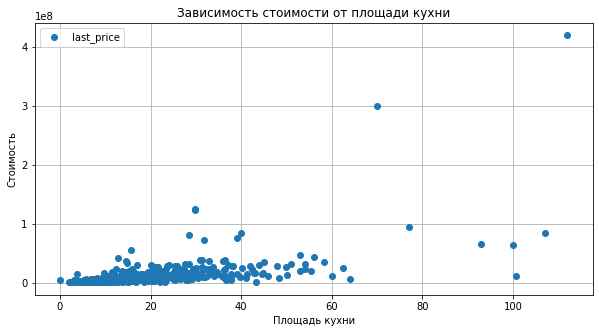

In [87]:
#построение диаграммы разброса и корреляции при помощи сводной таблицы
good_df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5))

plt.title('Зависимость стоимости от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость')
print(good_df.pivot_table(index='kitchen_area', values=['last_price']).reset_index().corr())

<b>Краткий вывод: </b>Зависимость стоимости жилья от площади кухни имеет заметную корреляцию (0,59). Зависимость по-прежнему есть сохраняется.

<u><i>Зависимость стоимости от количества комнат</i></u>

               rooms  last_price
rooms       1.000000    0.326797
last_price  0.326797    1.000000


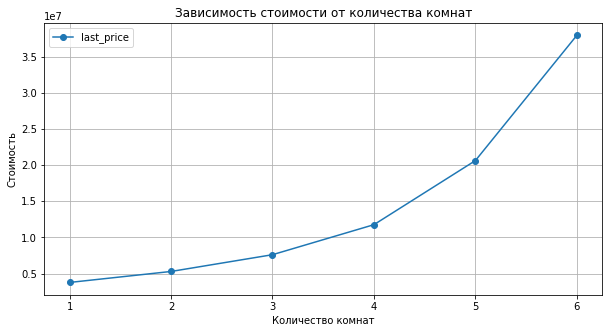

In [88]:
#построение диаграммы разброса и корреляции при помощи сводной таблицы
good_df.query('rooms > 0 & rooms < 7').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))

plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
print(good_df.pivot_table(index='rooms', values=['last_price']).reset_index().corr())

<b>Краткий вывод: </b>Зависимость стоимости жилья от количества комнат имеет умеренную корреляцию - 0,33. Чем больше комнат, тем дороже жилье. Это также логично, так как в данном случае и больше общая площадь.

<u><i>Зависимость стоимости от типа этажа</i></u>

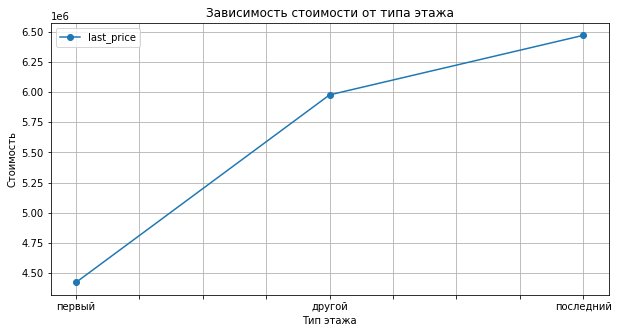

In [89]:
#построение графика при помощи сводной таблицы
good_df.pivot_table(index='floor_info', values='last_price').sort_values(by='last_price', ascending=True).plot(grid=True, style='o-', figsize=(10, 5))

plt.title('Зависимость стоимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость')
plt.show()

<b>Вывод: </b>Как видно из графика самая дешевая стоимость у квартир на первых этаж. Можно предположить, что чем выше этаж, тем больше стоимость жилья.

<u><i>Зависимость стоимости от даты размещения объявления</i></u>

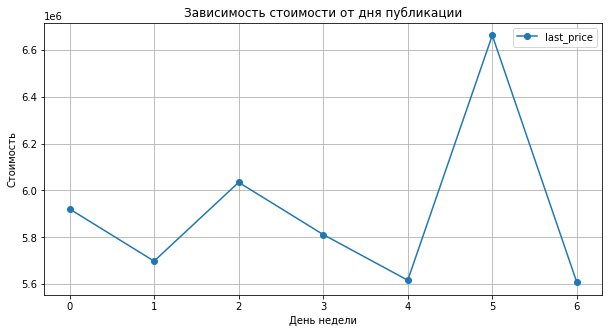

In [90]:
good_df.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))

plt.title('Зависимость стоимости от дня публикации')
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.show()

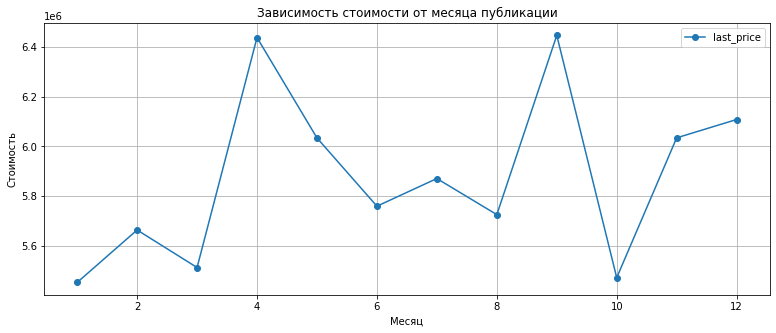

In [91]:
good_df.pivot_table(index='monht_exposition', values='last_price').plot(grid=True, style='o-', figsize=(13, 5))

plt.title('Зависимость стоимости от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

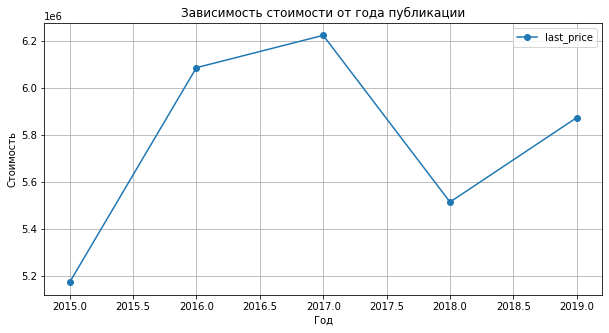

In [92]:
good_df.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))

plt.title('Зависимость стоимости от года публикации')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

<b>Краткий вывод: </b>Как видно из проведенного анализа самая высокая стоимость у объявлений, размещенных в среду или субботу. Самые дешевые объявления размещаются в воскресенье или пятницу. В части зависимости стоимости от месяца размещения наблюдается 3 пика: в апреле и августе примерно одинаковые, а также в декабре. Минимальная стоимость наблюдается в октябре. Также стоит отметить, что, начиная с 2014 года, стоимость жилья растет, затем в 2018 стоимость упала. В 2019 году наметился тренд на разворот.

<u><i>Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [93]:
#подготовка сводной таблицы
df_top_ten = df.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False).head(10)
df_top_ten.columns=['count adds']

df_top_ten['price_sq_metrs_median'] = df.pivot_table(index='locality_name', values='price_sq_metrs', aggfunc='median')
df_top_ten['price_sq_metrs_min'] = df.pivot_table(index='locality_name', values='price_sq_metrs', aggfunc='min')
df_top_ten['price_sq_metrs_max'] = df.pivot_table(index='locality_name', values='price_sq_metrs', aggfunc='max')
df_top_ten

,count adds,price_sq_metrs_median,price_sq_metrs_min,price_sq_metrs_max
locality_name,,,,
Санкт-Петербург,15641,104790.420,15345.27,1907500.00
Мурино,586,86250.375,50000.00,138580.25
Кудрово,469,95588.240,54160.35,160401.00
Шушары,439,76829.270,47700.42,147826.09
Всеволожск,397,65789.470,31400.00,640422.35
Пушкин,369,100000.000,59836.07,256521.74
Колпино,338,74723.745,47957.37,125000.00
Парголово,327,91642.860,39205.96,138522.43
Гатчина,307,67796.610,10507.25,146315.79


<b>Краткий вывод: </b>Больше всего предложений ожидаемо в Санкт-Петербурге. В местах со 2 по 5 количество объявление находятся в диапазоне 200. Самая высокая цена и самая высокая средняя цена также в Санкт-Петербурге - 1,9 млн руб. и 115 тыс. руб. за кв. метр соответственно. Самый дешевый средний кв. метр стоит 10,5 тыс. руб. в Гатчине.

<b>Определение цены за каждый км от центра Санкт-Петербурга

In [94]:
spb = (df
      .query('locality_name == "Санкт-Петербург"')
      .pivot_table(index='city_centers_nearest_km', values=['price_sq_metrs'], aggfunc={'count','mean'})
      .round(2).reset_index()) 
spb.columns = spb.columns.droplevel(0)
spb = spb.rename(columns={'count':'кол-во', 'mean':'ср. цена'})
spb.head(10)

,,кол-во,ср. цена
0,0,146,174708.37
1,1,240,166603.76
2,2,307,146662.86
3,3,524,129526.93
4,4,903,137413.43
5,5,768,146978.31
6,6,470,152277.89
7,7,406,141404.91
8,8,666,119819.21
9,9,687,110187.82


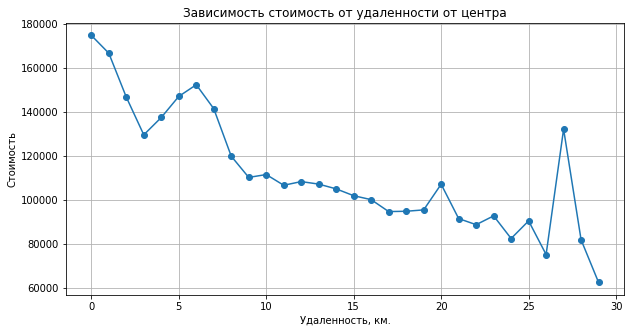

In [95]:
spb['ср. цена'].plot(grid=True, style='o-', figsize=(10, 5))
plt.title('Зависимость стоимость от удаленности от центра')
plt.xlabel('Удаленность, км.')
plt.ylabel('Стоимость')
plt.show()

<b>Краткий вывод: </b> Из проведенного анализа видно, что чем ближе квартира к центру, тем дороже цена среднего квадратного метра. Самая высокая цена - 174 708 руб. Правда выбивается  провал по цене на расстоянии 3 км. Также стоит отметить резкий скачок цен в 27 км. от центра (цена - 132 115). Наблюдается несколько всплесков на 20, 23 и 25 км. Возможно такие скачки связаны с типом жилья.

<a href='#start'>В начало</a>

<a id='section5'></a>
### Общий вывод

<b><i>1) В части предобработки данных</i></b><br><br>
При анализе массива данных было обнаружено большое число пропущенных значений (по некоторым данным пропуски достигали 20 000). Для устранения пропусков былы применены методы удаления строк (если таких значений не много), замены на 0 (там где это логически возможно и можно объяснить причину пропуска), замену на медианные значения. Пропуски, которые не возможно подменить, были оставлены. Также были привидены в соответствия типы столбцов, были отработаны аномалии (путем правок или удаления). Произведена подмена неявных дубликатов. В результате предобработки данных массив состоял из 23,5 тыс. данных.<br><br>
<b><i>2) В части анализа заданных параметров</i></b><br><br>
- наиболешее количество предложений по объявлениям приходится на размер квартир общей площадью от 30 до 45 кв. м. Самое большое количество предложений для квартир с площадью 45 кв.м.;<br>
- больше всего предложений приходится на жилую площадь в диапозоне от 15 до 20 кв. м.;<br>
- самые популярные размеры кухонь держаться в диапазоне 6 - 10 кв. м.;<br>
- наибольшее число предложений со стоимостью квартирт 3,2-5,2 млн руб.;<br>
- больше всего продается одно- или двухкомнатных квартир;<br>
- наиболешее количество предложений для 5 и 10 этажных домов;<br>
- больше всего объявлений на 2 и 3 этажах, и далее на спад;<br>
- больше всего предложений для квартир на расстоянии от 10 до 16 км. от центра;<br>
- пик предложений приходится на расстоянии от 12 до 27 км. от аэропорта;<br>
- наибольшее предложений по прадажам для квартир на удаленности от парка порядка 380 - 650 метров;<br>
- чаше всего объявления публикуют в четверг и вторник. В выходные, ожидаемое, размещений меньше. Меньше всего объевления в январе и мае, вероятно из-зи большого количества праздников.<br><br>

<b><i>3) В части факторов, влияющих на стоимость квартиры</i></b><br><br>
Стоит отметить, что общая и жилая площадь, а также площадь кухни влияют на стоимость квартир и имеют заметную корреляцию. Количество комнат имеют умеренную корреляцию. Но чем больше комнат, тем дороже жилье. Это также логично, так как в данном случае и больше общая площадь.<br><br>
<b><i>3) В части анализа сроков продажи квартиры</i></b><br><br>
В среднем квартира продается за 83 дня. Максимальный срок продажи квартиры составил 1572 дня. Быстрой продажей можно считать квартиры, которые были проданы менее, чем за 33 дня. Продажи свыше 250 дней можно считать уже крайне долгими.<br><br>
<b><i>4) В части анализа средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</i></b><br><br>
Больше всего предложений (15,6 тыс.), самая высокая цена (1,9 млн) и самая высокая средняя цена (115 тыс. руб.) ожидаемо в Санкт-Петербурге. Самый дешевый средний кв. метр стоит 10,5 тыс. руб. в Гатчине.<br><br>
<b><i>5) В части анализа средней цены каждого километра в Санкт-Петербурге</i></b><br><br>
Самая высокая цена ожидаемо для квартиры, которая располагается ближе всего к центру - 174,7 тыс. руб. Выбивается провал по цене на расстоянии 3 км (снижение до 129,5 тыс. руб.). Также стоит отметить резкий скачок цен в 27 км. от центра (цена - 132,1 тыс. руб.).

<a href='#start'>В начало</a>